将 game_player 文件夹复制到当前文件夹

当前目录结构

- pysekiro_with_RL
    - game_player
        - \__init__.py
        - brain.py
        - control_keyboard_keys.py
        - detect_keyboard_keys.py
        - grab_screen.py
        - others.py
        - run.py

# 1 读取游戏画面

代码：[grab_screen.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/grab_screen.py)

调节游戏的分辨率，最后选最小的，越小越好，我这里选择的是 800x450 的。（**修改分辨率后最好重启游戏**）

**强烈建议把游戏放左上角**

In [ ]:
# 运行以下代码，找到边框位置
from game_player.grab_screen import get_full_screen
from game_player.others import get_xywh
screen = get_full_screen()
get_xywh(screen)

打开 grab_screen.py ,修改如下  
**修改前**
~~~python
# ---------- 注意：以下需要设置 ----------

GAME_WIDTH   = 0    # 游戏窗口宽度
GAME_HEIGHT  = 0    # 游戏窗口高度
white_border = 0    # 游戏边框

# ---------- 注意：以上需要设置 ----------
~~~
**修改后**
~~~python
# ---------- 注意：以下需要设置 ----------

GAME_WIDTH   = 800    # 游戏窗口宽度，按游戏里面的来填
GAME_HEIGHT  = 450    # 游戏窗口高度，按游戏里面的来填
white_border = 31     # 游戏边框，把上面生成的y值填入这里

# ---------- 注意：以上需要设置 ----------
~~~
保存 grab_screen.py

**记得重启内核，否则或报错**

In [ ]:
# 测试效果
import cv2
from game_player.grab_screen import get_game_screen

screen = get_game_screen()
cv2.imshow('screen', screen)
cv2.waitKey(0)

# 2 操作游戏

代码：[control_keyboard_keys.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/control_keyboard_keys.py)

根据游戏里设置的按键来定义执行相应动作函数

我设置的是攻击、弹反、垫步、跳跃，位移太复杂就不要了  
- 攻击键我设置为 **J**
- 弹反键我设置为 **K**
- 垫步键默认是 左边的SHIFT键，在第57~166行内的第145行发现 **LSHIFT**，代表左SHIFT键
- 跳跃键默认是 空格键，在第57~166行内的第133行发现 **SPACE**，代表空格键

delay我设置的是0.05 ，因为按这些键不需要很长时间，我做过实验，发现0.01秒也是可行的。

打开 control_keyboard_keys.py ,修改如下  
**修改前**
~~~python
# ---------- 以下需要修改或补充 ----------

def W(delay=1):    # 移动 前
    PressKey(dk['W'])
    time.sleep(delay)
    ReleaseKey(dk['W'])

def S(delay=1):    # 移动 后
    PressKey(dk['S'])
    time.sleep(delay)
    ReleaseKey(dk['S'])

def A(delay=1):    # 移动 左
    PressKey(dk['A'])
    time.sleep(delay)
    ReleaseKey(dk['A'])

def D(delay=1):    # 移动 右
    PressKey(dk['D'])
    time.sleep(delay)
    ReleaseKey(dk['D'])

# ---------- 以上需要修改或补充 ----------
~~~
**修改后**
~~~python
# ---------- 以下需要修改或补充 ----------

def J(delay=0.05):    # 攻击
    PressKey(dk['J'])
    time.sleep(delay)
    ReleaseKey(dk['J'])

def K(delay=0.05):    # 防御
    PressKey(dk['K'])
    time.sleep(delay)
    ReleaseKey(dk['K'])

def LSHIFT(delay=0.05):    # 垫步
    PressKey(dk['LSHIFT'])
    time.sleep(delay)
    ReleaseKey(dk['LSHIFT'])

def SPACE(delay=0.05):    # 跳跃
    PressKey(dk['SPACE'])
    time.sleep(delay)
    ReleaseKey(dk['SPACE'])

# ---------- 以上需要修改或补充 ----------
~~~
保存 control_keyboard_keys.py

**记得重启内核，否则或报错**

In [ ]:
# 测试一下效果
import time

from game_player.control_keyboard_keys import J, K, LSHIFT, SPACE

time.sleep(3)
for _ in range(5):
    print(1)
    J()
    time.sleep(0.7)
    K()
    time.sleep(0.2)
    LSHIFT()
    time.sleep(0.7)
    SPACE()
    time.sleep(1.2)

## 2.1 修改智能体的动作执行部分

代码：[brain.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/brain.py)

打开 brain.py ,修改如下

第一部分 **修改前**
~~~python
# ---------- 以下根据 control_keyboard_keys.py 里定义的函数来导入 ----------
from game_player.control_keyboard_keys import W, S, A, D
# ---------- 以上根据 control_keyboard_keys.py 里定义的函数来导入 ----------
~~~
第一部分 **修改后**
~~~python
# ---------- 以下根据 control_keyboard_keys.py 里定义的函数来导入 ----------
from game_player.control_keyboard_keys import J, K, LSHIFT, SPACE
# ---------- 以上根据 control_keyboard_keys.py 里定义的函数来导入 ----------
~~~

第二部分 **修改前**
~~~python
# ---------- 以下根据 control_keyboard_keys.py 里定义的函数来修改 ----------

"""
将所有的动作都编码成数字，并且数字满足从零开始和正整数的要求。
例如
    W 移动 前 0
    S 移动 后 1
    A 移动 左 2
    D 移动 右 3
"""

# 执行动作
if   action == 0:
    W()
elif action == 1:
    S()
elif action == 2:
    A()
elif action == 3:
    D()
elif action == 4:    # 等你添加，不需要可以删除
    pass
# 不够可以添加，注意，一定要是正整数，还要和上一个相邻
# ---------- 以上根据 control_keyboard_keys.py 里定义的函数来修改 ----------
~~~
第二部分 **修改后**
~~~python
# ---------- 以下根据 control_keyboard_keys.py 里定义的函数来修改 ----------

"""
将所有的动作都编码成数字，并且数字满足从零开始和正整数的要求。
例如
    J      攻击 0
    K      弹反 1
    LSHIFT 垫步 2
    SPACE  跳跃 3
"""

# 执行动作
if   action == 0:
    J()
elif action == 1:
    K()
elif action == 2:
    LSHIFT()
elif action == 3:
    SPACE()

# 不够可以添加，注意，一定要是正整数，还要和上一个相邻
# ---------- 以上根据 control_keyboard_keys.py 里定义的函数来修改 ----------
~~~

保存 brain.py

# 3 量化人物状态

代码：[others.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/others.py)

**注意：本节采用边缘检测的方法量化人物状态，但是这个方法有一个缺陷，就是必须边缘存在，否则无法正确量化为数值。**

建议在游戏里截一张屏设为壁纸，就不用总是开始游戏了

## 3.1 读取自身生命

In [ ]:
# 读取游戏画面的代码
import cv2
from game_player.grab_screen import get_game_screen

screen = get_game_screen()
cv2.imshow('screen', screen)
cv2.waitKey(0)

In [ ]:
from game_player.others import get_xywh
get_xywh(screen)

In [ ]:
from game_player.others import roi
screen_roi = roi(screen, x=48, x_w=307, y=406, y_h=410)

In [ ]:
import numpy as np

In [ ]:
canny = cv2.Canny(cv2.GaussianBlur(screen_roi,(3,3),0), 0, 100)
value = canny.argmax(axis=-1)
print(value)
print('平均值', np.mean(value))
print('中位数', np.median(value))

封装成函数

In [ ]:
def get_Self_HP(img):
    img = roi(img, x=48, x_w=307, y=406, y_h=410)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

In [ ]:
# 测试效果
while True:
    screen = get_game_screen()
    Self_HP = get_Self_HP(screen)
    print(f'\r {str(Self_HP):<10}', end='')
    cv2.waitKey(1)

## 3.2 读取自身架势

**受架势显示与否的影响，不显示就无法正确读取**

In [ ]:
# 读取游戏画面的代码
import cv2
from game_player.grab_screen import get_game_screen

screen = get_game_screen()
cv2.imshow('screen', screen)
cv2.waitKey(0)

In [ ]:
from game_player.others import get_xywh
get_xywh(screen)

In [ ]:
from game_player.others import roi
screen_roi = roi(screen, x=402, x_w=491, y=388, y_h=390)

In [ ]:
import numpy as np

In [ ]:
canny = cv2.Canny(cv2.GaussianBlur(screen_roi,(3,3),0), 0, 100)
value = canny.argmax(axis=-1)
print(value)
print('平均值', np.mean(value))
print('中位数', np.median(value))

封装成函数

In [ ]:
def get_Self_Posture(img):
    img = roi(img, x=402, x_w=491, y=388, y_h=390)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

In [ ]:
# 测试效果
while True:
    screen = get_game_screen()
    Self_Posture = get_Self_Posture(screen)
    print(f'\r {str(Self_Posture):<10}', end='')
    cv2.waitKey(1)

## 3.3 读取目标生命

In [ ]:
# 读取游戏画面的代码
import cv2
from game_player.grab_screen import get_game_screen

screen = get_game_screen()
cv2.imshow('screen', screen)
cv2.waitKey(0)

In [ ]:
from game_player.others import get_xywh
get_xywh(screen)

In [ ]:
from game_player.others import roi
screen_roi = roi(screen, x=48, x_w=219, y=40, y_h=45)

In [ ]:
import numpy as np

In [ ]:
canny = cv2.Canny(cv2.GaussianBlur(screen_roi,(3,3),0), 0, 100)
value = canny.argmax(axis=-1)
print(value)
print('平均值', np.mean(value))
print('中位数', np.median(value))

封装成函数

In [ ]:
def get_Target_HP(img):
    img = roi(img, x=48, x_w=219, y=40, y_h=45)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

In [ ]:
# 测试效果
while True:
    screen = get_game_screen()
    Target_HP = get_Target_HP(screen)
    print(f'\r {str(Target_HP):<10}', end='')
    cv2.waitKey(1)

## 3.4 读取目标架势

**受架势显示与否的影响，不显示就无法正确读取**

In [ ]:
# 读取游戏画面的代码
import cv2
from game_player.grab_screen import get_game_screen

screen = get_game_screen()
cv2.imshow('screen', screen)
cv2.waitKey(0)

In [ ]:
from game_player.others import get_xywh
get_xywh(screen)

In [ ]:
from game_player.others import roi
screen_roi = roi(screen, x=402, x_w=554, y=27, y_h=31)

In [ ]:
import numpy as np

In [ ]:
canny = cv2.Canny(cv2.GaussianBlur(screen_roi,(3,3),0), 0, 100)
value = canny.argmax(axis=-1)
print(value)
print('平均值', np.mean(value))
print('中位数', np.median(value))

封装成函数

In [ ]:
def get_Target_Posture(img):
    img = roi(img, x=402, x_w=554, y=27, y_h=31)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

In [ ]:
# 测试效果
while True:
    screen = get_game_screen()
    Target_Posture = get_Target_Posture(screen)
    print(f'\r {str(Target_Posture):<10}', end='')
    cv2.waitKey(1)

## 3.5 整合数据

In [ ]:
def get_status(img):
    return get_Self_HP(img), get_Self_Posture(img), get_Target_HP(img), get_Target_Posture

---

打开 others.py ,修改如下  
**修改前**
~~~python
# ---------- 以下需要修改 ----------

def get_state_1(img):    # 自己改
    return 0

def get_state_2(img):    # 自己改
    return 0

def get_state_3(img):    # 自己改
    return 0

def get_state_4(img):    # 自己改
    return 0

# 不够就自己添加，多了就自己删除

def get_status(img):
    return get_state_1(img), get_state_2(img), get_state_3(img), get_state_4(img)    # 这里也要改成相应的函数名

# ---------- 以上需要修改 ----------
~~~
**修改后**
~~~python
# ---------- 以下需要修改 ----------

def get_Self_HP(img):
    img = roi(img, x=48, x_w=307, y=406, y_h=410)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

def get_Self_Posture(img):
    img = roi(img, x=402, x_w=491, y=388, y_h=390)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

def get_Target_HP(img):
    img = roi(img, x=48, x_w=219, y=40, y_h=45)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

def get_Target_Posture(img):
    img = roi(img, x=402, x_w=554, y=27, y_h=31)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

# 不够就自己添加，多了就自己删除

def get_status(img):
    return get_Self_HP(img), get_Self_Posture(img), get_Target_HP(img), get_Target_Posture(img)

# ---------- 以上需要修改 ----------
~~~
保存 others.py

In [ ]:
# 测试效果
import cv2
from game_player.grab_screen import get_game_screen
from game_player.others import get_status

while True:
    screen = get_game_screen()
    status = get_status(screen)
    print(f'\r {str(status):<30}', end='')
    cv2.waitKey(1)

# 4 修改模型

代码：[brain.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/brain.py)

~~~python
# 评估网络和目标网络的构建方法
def build_network(self):
    input_shape = [self.in_height, self.in_width, self.in_channels]

    inputs = tf.keras.Input(shape=input_shape, dtype=tf.uint8)
    x = tf.cast(inputs, tf.float32)
    outputs = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, weights=None, classes=self.outputs)(x)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(self.lr),    # 你觉得有更好的可以自己改
        loss=tf.keras.losses.CategoricalCrossentropy(),    # 你觉得有更好的可以自己改
        metrics=[tf.keras.metrics.CategoricalAccuracy()]
    )

    if self.load_weights_path:
        if os.path.exists(self.load_weights_path):
            model.load_weights(self.load_weights_path)
            print('Load ' + self.load_weights_path)
        else:
            print('Nothing to load')

    return model
~~~

计算机配置够好的话可以选择其他预训练模型  
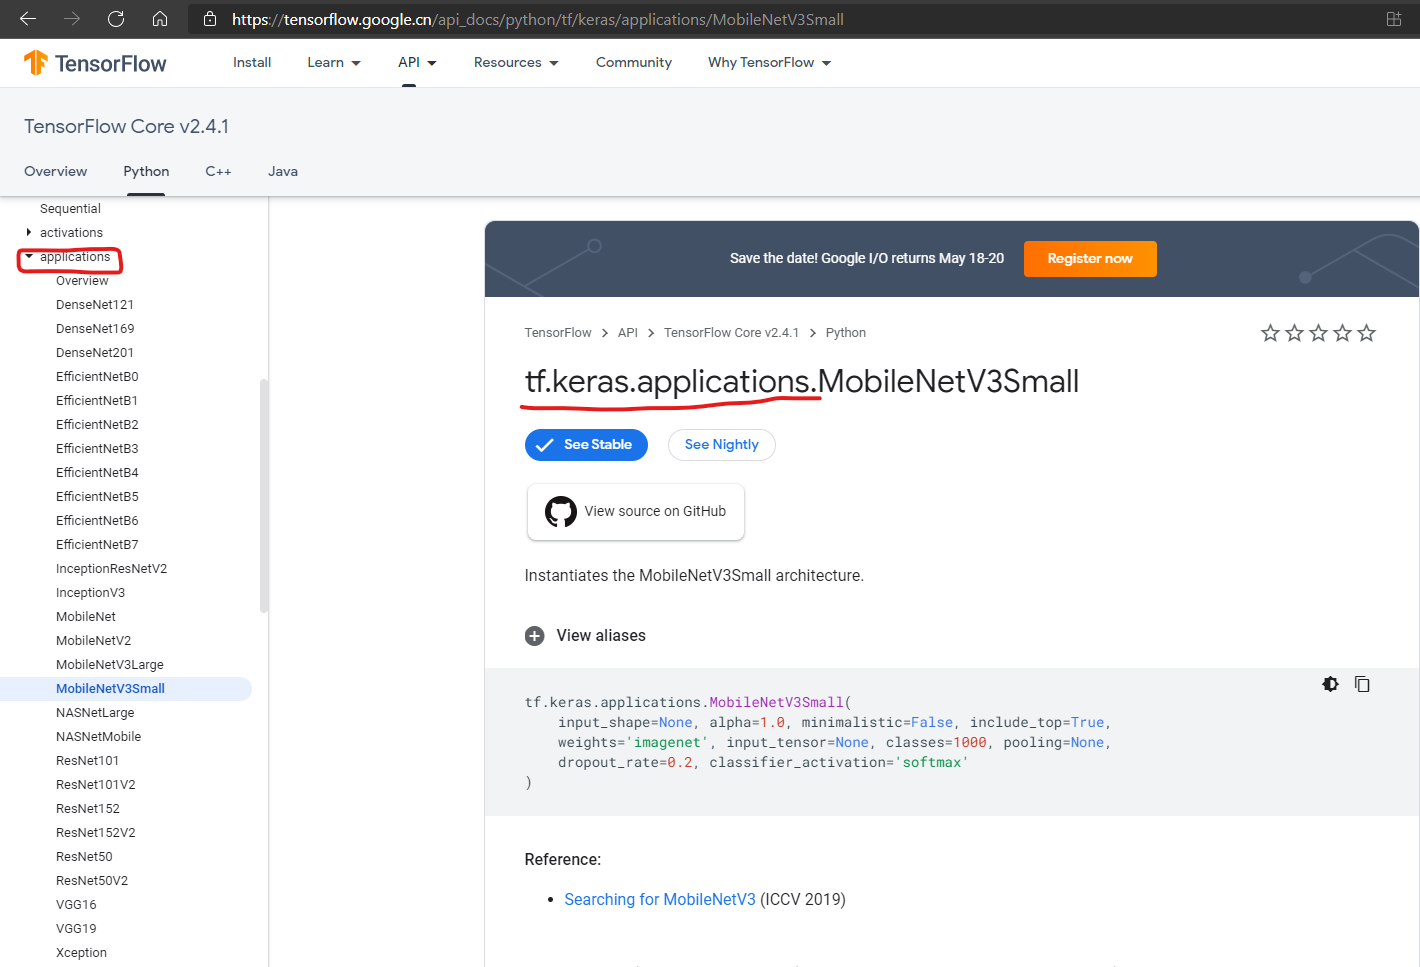

# 5 设置奖励

代码：[run.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/run.py)

**3.5 整合数据时定义的状态获取**
~~~python
def get_status(img):
    return get_Self_HP(img), get_Self_Posture(img), get_Target_HP(img), get_Target_Posture
~~~
返回的是一个元组，(自身生命值，自身架势值，目标生命值，目标架势值)，因此
~~~python
"""
next_status - cur_status
等于 (自身生命变化值，自身架势变化值，目标生命变化值，目标架势变化值)
"""
s1 = next_status[0] - cur_status[0]    # 自身生命变化值
s2 = next_status[1] - cur_status[1]    # 自身架势变化值
s3 = next_status[2] - cur_status[2]    # 目标生命变化值
s4 = next_status[3] - cur_status[3]    # 目标架势变化值
~~~
**注意：未来 - 现在**  
**注意：未来 - 现在**  
**注意：未来 - 现在**  
- 所以
    - 自身生命变化值 与 奖励 呈**正**相关
    - 自身架势变化值 与 奖励 呈**负**相关
    - 目标生命变化值 与 奖励 呈**负**相关
    - 目标架势变化值 与 奖励 呈**正**相关

~~~python
s1 *=  1    # 正相关
s2 *= -1    # 负相关
s3 *= -1    # 负相关
s4 *=  1    # 正相关
~~~

打开 run.py ,修改如下  
**修改前**
~~~python
# ---------- 以下根据 others.py 里定义的函数 get_status 来修改 ----------
# 通过列表索引的方式，取出相应的信息，用未来的状态信息减去当前的状态信息，得到状态变化值
s1 = next_status[0] - cur_status[0]
s2 = next_status[1] - cur_status[1]
s3 = next_status[2] - cur_status[2]
s4 = next_status[3] - cur_status[3]

"""
注意，未来 - 现在
假如你现在生命值 130（现在），过了一会生命值变成 63（未来）
计算：s = 63 - 130, s = -67, 生命值降低了67，生命值减低应该惩罚，那么s完全可以当成得分，得到 -67 分。

再假如Boss 现在生命值 112（现在）， 过了一会生命值变成 102（未来）
计算：s = 102 - 112, s = -10, Boss生命值降低了10，应该奖励才对，但是s为负值，所以要乘上 -1 ，这样才能得到正常的分数。

请根据具体的游戏来定义，不要生搬硬套，别搞得HP掉了还加分
"""
# 示例 定义得分
s1 *=  1    # 与 奖励 呈正相关，所以 +
s2 *= -1    # 与 惩罚 呈正相关，所以 -
s3 *= -1    # 与 惩罚 呈正相关，所以 -
s4 *=  1    # 与 奖励 呈正相关，所以 +

reward = s1 + s2 + s3 +s4
# ---------- 以上根据 others.py 里定义的函数 get_status 来修改 ----------
~~~
**修改后**
~~~python
# ---------- 以下根据 others.py 里定义的函数 get_status 来修改 ----------
# 通过列表索引的方式，取出相应的信息，用未来的状态信息减去当前的状态信息，得到状态变化值
"""
next_status - cur_status
等于 (自身生命变化值，自身架势变化值，目标生命变化值，目标架势变化值)
"""
s1 = next_status[0] - cur_status[0]    # 自身生命变化值
s2 = next_status[1] - cur_status[1]    # 自身架势变化值
s3 = next_status[2] - cur_status[2]    # 目标生命变化值
s4 = next_status[3] - cur_status[3]    # 目标架势变化值

# 示例 定义得分
s1 *=  1    # 正相关
s2 *= -1    # 负相关
s3 *= -1    # 负相关
s4 *=  1    # 正相关

reward = s1 + s2 + s3 +s4
# ---------- 以上根据 others.py 里定义的函数 get_status 来修改 ----------
~~~
保存 run.py

# 6 最后，参数设置

## 6.1 控制背景信息的输入

### 6.1.1 前言

$~~~$$~~~$只狼是3D游戏，背景是动态且复杂的。大量的背景不仅对训练无益，还会导致模型出现严重的欠拟合现象。在这种情况下，智能体连什么是背景什么是人物都分不清，就更别提训练要有什么效果了。  
$~~~$$~~~$目前背景减除的各种方法，都是基于静态背景的。比如用摄像头做行人检测，摄像头是固定的，所以背景不变，变的只有行人。就算摄像头会转动，但起码整个背景空间有限。  
$~~~$$~~~$那么不做背景减除，换个角度思考，先做运动目标检测，再通过掩码的方式保留运动目标，去除背景。不得不说，这个效果肯定会比什么都不做好，但是问题仍然没有解决。目标检测的结果是矩形的，仍然有部分背景没有去除。  
$~~~$$~~~$那人体姿态估计呢，图像什么的都不要了，就留个火柴人，用三维卷积来学习运动轨迹。这个想法非常棒，但是我不确定人体姿态估计能不能检测只狼里面的人，而且破戒僧、狮子猿、怨恨之鬼还有鬼形部身下的马觉得很淦。  
$~~~$$~~~$**所以，这部分我也无能为力了**

### 6.1.2 目前使用的解决方法

量化人物状态的时候，需要整个游戏画面，但是给模型训练的时候并不需要那么多，特别是背景，对于训练来说是冗余的。我们需要的只是双方对战的部分图像就够了。

这个时候，就要设置以下参数
~~~python
x   = 0    # 左 不小于0，小于 x_w
x_w = 0    # 右 不大于图像宽度，例如 800，大于 x
y   = 0    # 上 不小于0，小于 y_h
y_h = 0    # 下不大于图像高度，例如 450，大于 y
~~~
由于双方的动作大部分处于中间
所以我们可以先暂时作以下设置
~~~python
x   = 800 // 2 - 100    # 左 不小于0，小于 x_w
x_w = 800 // 2 + 100    # 右 不大于图像宽度，例如 800，大于 x
y   = 450 // 2 - 100    # 上 不小于0，小于 y_h
y_h = 450 // 2 + 100    # 下不大于图像高度，例如 450，大于 y
~~~
这样就获得了 200x200 战斗部分图像

In [ ]:
# 测试效果
import cv2

from game_player.grab_screen import get_game_screen
from game_player.others import roi, get_xywh

x   = 800 // 2 - 100    # 左 不小于0，小于 x_w
x_w = 800 // 2 + 100    # 右 不大于图像宽度，例如 800，大于 x
y   = 450 // 2 - 100    # 上 不小于0，小于 y_h
y_h = 450 // 2 + 100    # 下不大于图像高度，例如 450，大于 y

while True:
    screen = get_game_screen()
    cv2.imshow('screen', screen)
    cv2.imshow('roi', roi(screen, x, x_w, y, y_h))
    cv2.waitKey(1)

如果不够，就增大范围，例如

In [ ]:
# 测试效果
import cv2

from game_player.grab_screen import get_game_screen
from game_player.others import roi, get_xywh

# 400 x 400 战斗部分图像
x   = 800 // 2 - 200    # 左 不小于0，小于 x_w
x_w = 800 // 2 + 200    # 右 不大于图像宽度，例如 800，大于 x
y   = 450 // 2 - 200    # 上 不小于0，小于 y_h
y_h = 450 // 2 + 200    # 下不大于图像高度，例如 450，大于 y

while True:
    screen = get_game_screen()
    cv2.imshow('screen', screen)
    cv2.imshow('roi', roi(screen, x, x_w, y, y_h))
    cv2.waitKey(1)

## 6.2 设置输入模型的参数

~~~python
in_depth    = 1     # 三维卷积用的，二维卷积不用管，也不要修改
in_height   = 224    # 图像高度，图像缩放用
in_width    = 224    # 图像宽度，图像缩放用
in_channels = 3     # 颜色通道数量
outputs = 4     # 动作数量，智能体能够执行几个动作就写几个，也可以 +1 ，增加其他类
lr = 0.001      # 默认学习率是0.001，如果要修改的话，前期可以设置大点，快速收敛，后期设置小一点，提升学习效果
~~~

**注意：in_height, in_width是输入模型的尺寸，最好和战斗部分图像的尺寸同时成比例缩放**  
~~~python
x   = 800 // 2 - 200
x_w = 800 // 2 + 200
y   = 450 // 2 - 200
y_h = 450 // 2 + 200

w = x_w - x    # 结果为 400
h = y_h - y    # 结果为 400

in_height   = 50
in_width    = 50

print(h // in_height, w // in_width)    # 结果为 8, 8，代表同时缩放了 8 倍
~~~

## 6.3 强化学习部分参数

~~~python
gamma = 0.99    # 奖励衰减，未来对现在的重要程度，设置为 1 代表同等重要，模型更有远瞻性；设置的越小说明越重视当前的决策。
replay_memory_size = 10000    # 记忆容量
replay_start_size = 500       # 开始经验回放时存储的记忆量，到达最终探索率后才开始
batch_size = 16               # 样本抽取数量
update_freq = 200                   # 训练评估网络的频率
target_network_update_freq = 500    # 更新目标网络的频率
~~~

---

打开 run.py ,修改如下  
**修改前**
~~~python
# -------------------- 一些参数，根据实际情况修改 --------------------

x   = 0
x_w = 0
y   = 0
y_h = 0

in_depth    = 1
in_height   = 50    # 图像高度
in_width    = 50    # 图像宽度
in_channels = 1     # 颜色通道数量
outputs = 4     # 动作数量
lr = 0.001      # 学习率

gamma = 0.99    # 奖励衰减
replay_memory_size = 10000    # 记忆容量
replay_start_size = 500       # 开始经验回放时存储的记忆量，到达最终探索率后才开始
batch_size = 16               # 样本抽取数量
update_freq = 200                   # 训练评估网络的频率
target_network_update_freq = 500    # 更新目标网络的频率

# -------------------- 一些参数，根据实际情况修改 --------------------
~~~
**修改后**
~~~python
# -------------------- 一些参数，根据实际情况修改 --------------------

# 400 x 400 战斗部分图像
x   = 800 // 2 - 200    # 左 不小于0，小于 x_w
x_w = 800 // 2 + 200    # 右 不大于图像宽度，例如 800，大于 x
y   = 450 // 2 - 200    # 上 不小于0，小于 y_h
y_h = 450 // 2 + 200    # 下不大于图像高度，例如 450，大于 y

in_depth    = 1
in_height   = 50    # 图像高度
in_width    = 50    # 图像宽度
in_channels = 1     # 颜色通道数量
outputs = 4     # 动作数量
lr = 0.001      # 学习率

gamma = 0.99    # 奖励衰减
replay_memory_size = 10000    # 记忆容量
replay_start_size = 500       # 开始经验回放时存储的记忆量，到达最终探索率后才开始
batch_size = 16               # 样本抽取数量
update_freq = 200                   # 训练评估网络的频率
target_network_update_freq = 500    # 更新目标网络的频率

# -------------------- 一些参数，根据实际情况修改 --------------------
~~~
保存 run.py

# 7 开始训练

In [ ]:
from game_player.run import Agent
target = 'Genichiro_Ashina' # 苇名弦一郎
# target = 'Inner_Genichiro' # 心中的弦一郎
# target = 'True Monk' # 宫内破戒僧
# target = 'Isshin,_the_Sword_Saint' # 剑圣一心
# target = 'Inner_Isshin' # 心中的一心
agent = Agent(
    save_memory_path = target + '_memory.json',    # 注释这行就不保存记忆
    load_memory_path = target + '_memory.json',    # 注释这行就不加载记忆
    save_weights_path = target + '_w.h5',    # 注释这行就不保存模型权重
    load_weights_path = target + '_w.h5'     # 注释这行就不加载模型权重
)
agent.run()

# 8 测试

In [ ]:
from game_player.run import Agent
target = 'Genichiro_Ashina' # 苇名弦一郎
# target = 'Inner_Genichiro' # 心中的弦一郎
# target = 'True Monk' # 宫内破戒僧
# target = 'Isshin,_the_Sword_Saint' # 剑圣一心
# target = 'Inner_Isshin' # 心中的一心

train = Play_Sekiro_Online(
    load_weights_path = target + '_w.h5'
)
train.run()